In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
con = duckdb.connect()
con.execute("""-- Set memory limits before running query
                SET memory_limit='16GB';
                -- Enable progress tracking
                SET enable_progress_bar=true;
                -- Enable detailed profiling
                SET profiling_mode='detailed';
            """)

Creating views for all parquets

In [3]:
parquet_path = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0000_part_00.parquet"
view_name = "webcat_view_V2"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path}');
""")

sum_00 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_00

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0471s             ││
│└───────────��──────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││     

,guid,sum(duration_ms)
0,000091c0adc149389235ed2c5f15a59e,32002277.0
1,0000af8fab2d4669bad5917875158ab9,485258236.0
2,0002deb808fe4d6281c1159ebce45fad,6227575.0
3,0002ebb7751c41e982e43afc7d656158,177538620.0
4,00042b155a4b45a19f6c19c2cf74954f,27258387.0
...,...,...
64271,fffd0381b30d4ab6b5af52d0acf3d671,366366853.0
64272,fffd3160ab8245b7af08195a43789194,2066807.0
64273,fffdc52790524a1aa012d1d1ac6f3b3c,452309.0
64274,fffdf54ca6d14064b2dc5514fa8a4483,188720762.0


In [4]:
parquet_path_01 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0000_part_00.parquet"
view_name = "webcat_view_V2_01"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_01}');
""")

sum_01 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_01

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_01 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0321s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,000091c0adc149389235ed2c5f15a59e,32002277.0
1,0000af8fab2d4669bad5917875158ab9,485258236.0
2,0002deb808fe4d6281c1159ebce45fad,6227575.0
3,0002ebb7751c41e982e43afc7d656158,177538620.0
4,00042b155a4b45a19f6c19c2cf74954f,27258387.0
...,...,...
64271,fffd0381b30d4ab6b5af52d0acf3d671,366366853.0
64272,fffd3160ab8245b7af08195a43789194,2066807.0
64273,fffdc52790524a1aa012d1d1ac6f3b3c,452309.0
64274,fffdf54ca6d14064b2dc5514fa8a4483,188720762.0


In [5]:
parquet_path_02 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0002_part_00.parquet"
view_name = "webcat_view_V2_02"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_02}');
""")

sum_02 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_02

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_02 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0588s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,0000215f64624fbc99f8c23800d7e60f,1.237086e+08
1,00018fc022644c74a3b38f9d4ae19982,1.315521e+08
2,00025787579448cbadcffeb697ff37bb,1.470789e+09
3,0003039c87b8468399d03b0b5284f948,1.636941e+09
4,0003b447d9a94e1c9fb20e9ed64c0ea3,3.837889e+07
...,...,...
63888,fffb9724bcf447bbb7f3fffdeb3b3c8f,5.677066e+08
63889,fffc1580d20a429c9e8025657df3c6da,4.394158e+09
63890,fffe89c4607c4d0383555ea09d27ec2c,1.702209e+07
63891,fffea86c3c6c489196f38fbc002b6020,9.649003e+08


In [6]:
parquet_path_03 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0003_part_00.parquet"
view_name = "webcat_view_V2_03"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_03}');
""")

sum_03 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_03

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_03 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0453s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,00010ab0daf7426b813be3de1288b9a0,1.799117e+07
1,0001211c45ad4dcb87ff011669f690be,4.474550e+08
2,0001c374d0a346b3a4a2a65305e902c0,8.860773e+07
3,00022a0f7bdd4adbb1f4440dc14c577c,1.059740e+07
4,0002b3a7a7ae48c58c7d58a185022e9f,4.940082e+07
...,...,...
63648,fffcac4807504e719ea4dbe6f79f9cc7,1.077108e+09
63649,fffd1c357c49416ba84774d0f7608c13,6.887841e+07
63650,fffe6ad935294f219990de1e8c77e389,2.238288e+09
63651,ffffae38f04645a7a8c400dd355e9dd9,1.168417e+06


In [7]:
parquet_path_04 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0004_part_00.parquet"
view_name = "webcat_view_V2_04"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_04}');
""")

sum_04 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_04

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_04 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0531s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,0000ba15440c49eab545d00889b64f4a,2.803230e+07
1,0002014797694c23a09dd9535307b92f,8.052667e+06
2,00020252e77044649288bbbbd343cd35,8.901770e+08
3,0003bb43443444d29337c5c69d46d9c7,4.066860e+06
4,0003f638b52240b7b2db517a6f0d4206,5.372078e+09
...,...,...
64344,fff9e54f359f489c82901c8f1a1d148a,6.861620e+05
64345,fffa91941a54449bbe91d8cff3b27227,3.895961e+07
64346,fffc34ba12a94952bf773d228c4624e3,3.467506e+07
64347,fffccc41e0d84bcaa5a73f80eeb435d6,3.228486e+08


In [8]:
parquet_path_05 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0005_part_00.parquet"
view_name = "webcat_view_V2_05"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_05}');
""")

sum_05 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_05 

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_05 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0623s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,0001c8444e8a42d9a38674f737886d0e,4.777803e+07
1,0002dbfbb64b410f97183ab16f04f38d,6.238950e+05
2,000313c534c945dbbd08c8506ff1d417,5.011949e+08
3,0003d0dcf96349ac9f2187aa8070ad83,1.073392e+07
4,000459d810464092aab7e15297d90507,1.669451e+08
...,...,...
63911,fffd734f3e81495fb888888f315a6e5d,3.045614e+08
63912,fffe4a5123b7493a9b73156158e9f44e,4.118611e+09
63913,fffe5ccef8c045f1a2bea873c1e3cd74,8.392106e+07
63914,fffed90c103d4b04bed17dcdc78ca4bb,1.630720e+09


In [9]:
parquet_path_06 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0006_part_00.parquet"
view_name = "webcat_view_V2_06"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_06}');
""")

sum_06 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_06

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_06 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0662s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,0001443cb489423dbb1e174a58a55cd6,4.298956e+08
1,0001ce8cb3ee4a8987f2b98904fd781a,1.887416e+07
2,0002c9183ce94107b9db1cc2114b07e6,5.886532e+08
3,0004da2057b044bb9a76b97527c57f9e,2.504629e+06
4,0006f6a075804d7f8e2030f1324b9e5b,4.505646e+09
...,...,...
64003,fffc4c6e6c8c48d8817fc2def7d542a7,1.096581e+09
64004,fffd950dba7b4f15845ac7f6f96512c4,3.626901e+06
64005,fffe9d4ec6dc41e5b3a8401cb6241cca,2.666179e+08
64006,fffecd01fab94d65b1b072bac262c36e,3.005718e+08


In [10]:
parquet_path_07 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0007_part_00.parquet"
view_name = "webcat_view_V2_07"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_07}');
""")

sum_07 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_07

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_07 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0610s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,0000840b7c804caf8e3890735a080332,7.380005e+08
1,0000b5c7c1f54766873622d2f8786458,9.251420e+05
2,0000ca37c43749c7bb68b7fef594394d,7.555589e+06
3,0000e48dd4054610bd4b20ba6a8a3dbc,2.501403e+09
4,0001ef8bcd624bb8b3aac7ae96633d8c,2.754620e+07
...,...,...
63867,fffd238419db40f19330b98837063649,2.998080e+05
63868,fffdacffc8f1407f9c9cf3913a2f3fd2,2.256296e+09
63869,fffe4b21b1eb4732a690b6717d4e8413,2.537045e+09
63870,ffffb221dbbc4409a1b9b643f4123c18,4.711521e+08


In [11]:
# Aggregating mean duration (in hours) per user
merged_sum = pd.concat([sum_00, sum_01, sum_02, sum_03, sum_04, sum_05, sum_06, sum_07], ignore_index=True)
# Replace NaN with 0 for aggregation
merged_sum = merged_sum.replace(np.nan, 0) 
merged_sum = merged_sum.groupby('guid').mean().sort_values(by='guid')
merged_sum['sum(duration_ms)'] = merged_sum['sum(duration_ms)'] / 3600000
merged_sum = merged_sum.rename(columns={'sum(duration_ms)': 'avg_duration_hour'})
merged_sum.shape

(447967, 1)

In [12]:
merged_sum.describe()

,avg_duration_hour
count,447967.000000
mean,255.597748
std,685.103998
min,0.000000
25%,3.979109
50%,36.189886
75%,209.755670
max,35683.808953


In [13]:
merged_sum['avg_duration_hour'].mean()

np.float64(255.59774821236093)

In [14]:
merged_sum.head()

,avg_duration_hour
guid,
0000215f64624fbc99f8c23800d7e60f,34.363494
0000840b7c804caf8e3890735a080332,205.000133
000091c0adc149389235ed2c5f15a59e,8.889521
0000af8fab2d4669bad5917875158ab9,134.793954
0000b5c7c1f54766873622d2f8786458,0.256984


<Axes: title={'center': 'Average Duration per User (in hours)'}, xlabel='Average Duration (hours)', ylabel='Frequency'>

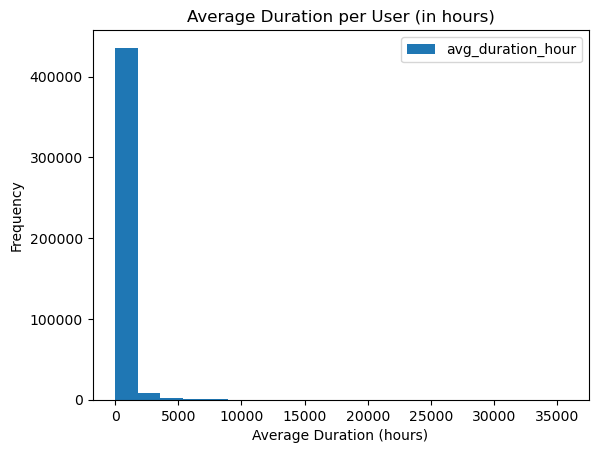

In [15]:
merged_sum.plot(kind='hist', bins=20, title='Average Duration per User (in hours)', xlabel='Average Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Average Duration per User (in hours) for users with less than 5000 hours'}, xlabel='Average Duration (hours)', ylabel='Frequency'>

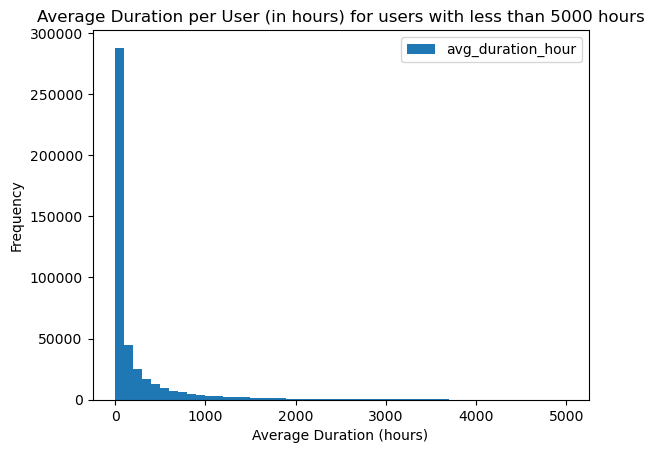

In [16]:
less_5000 = merged_sum[merged_sum['avg_duration_hour'] <= 5000]
less_5000.plot(kind='hist', bins=50, title='Average Duration per User (in hours) for users with less than 5000 hours', xlabel='Average Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Average Duration per User (in hours) for users with less than 1000 hours'}, xlabel='Average Duration (hours)', ylabel='Frequency'>

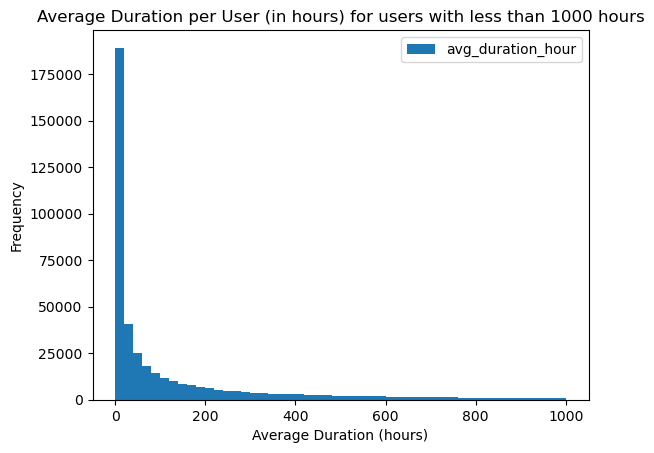

In [17]:
less_5000 = merged_sum[merged_sum['avg_duration_hour'] <= 1000]
less_5000.plot(kind='hist', bins=50, title='Average Duration per User (in hours) for users with less than 1000 hours', xlabel='Average Duration (hours)', ylabel='Frequency')

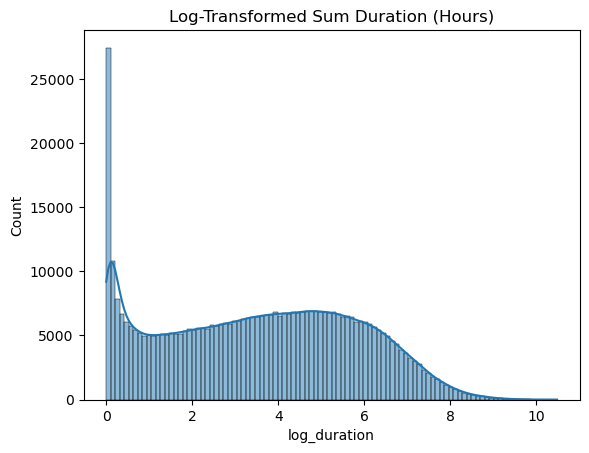

In [70]:
merged_sum['log_duration'] = np.log1p(merged_sum['avg_duration_hour'])
sns.histplot(merged_sum['log_duration'], bins=100, kde=True)
plt.title("Log-Transformed Sum Duration (Hours)")
plt.show()

<Axes: title={'center': 'Cumulative Duration per User (in hours)'}, xlabel='Cumulative Duration (hours)', ylabel='Frequency'>

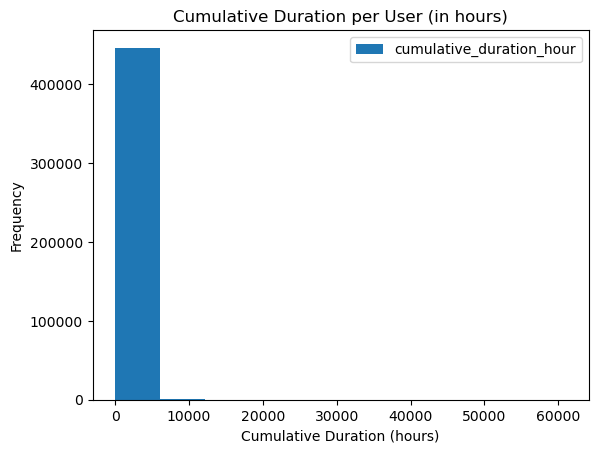

In [18]:
hours_sum = pd.concat([sum_00, sum_01, sum_02, sum_03, sum_04, sum_05, sum_06, sum_07], ignore_index=True)
hours_sum = hours_sum.replace(np.nan, 0)
hours_sum = hours_sum.groupby('guid').sum().sort_values(by='guid')
hours_sum['sum(duration_ms)'] = hours_sum['sum(duration_ms)'] / 3600000
hours_sum = hours_sum.rename(columns={'sum(duration_ms)': 'cumulative_duration_hour'})
hours_sum.plot(kind='hist', bins=10, title='Cumulative Duration per User (in hours)', xlabel='Cumulative Duration (hours)', ylabel='Frequency')

In [19]:
hours_sum.describe()

,cumulative_duration_hour
count,447967.000000
mean,292.151715
std,826.353698
min,0.000000
25%,4.363287
50%,39.823275
75%,231.911764
max,61033.096391


<Axes: title={'center': 'Cumulative Duration per User (in hours) for users with less than 5000 hours'}, xlabel='Cumulative Duration (hours)', ylabel='Frequency'>

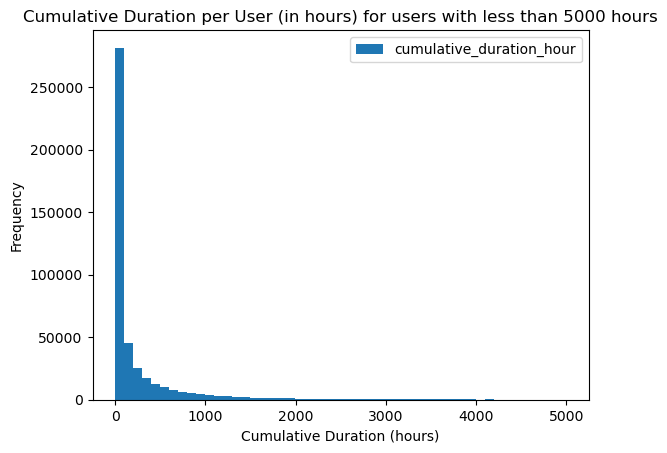

In [20]:
hours_sum_5000_less = hours_sum[hours_sum['cumulative_duration_hour'] <= 5000]
hours_sum_5000_less.plot(kind='hist', bins=50, title='Cumulative Duration per User (in hours) for users with less than 5000 hours', xlabel='Cumulative Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Cumulative Duration per User (in hours) for users with less than 2000 hours'}, xlabel='Cumulative Duration (hours)', ylabel='Frequency'>

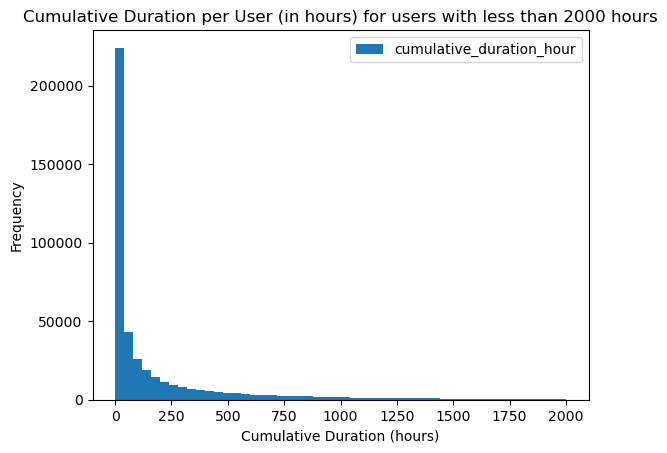

In [21]:
hours_sum_5000_less = hours_sum[hours_sum['cumulative_duration_hour'] <= 2000]
hours_sum_5000_less.plot(kind='hist', bins=50, title='Cumulative Duration per User (in hours) for users with less than 2000 hours', xlabel='Cumulative Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Cumulative Duration per User (in hours) for users with less than 1000 hours'}, xlabel='Cumulative Duration (hours)', ylabel='Frequency'>

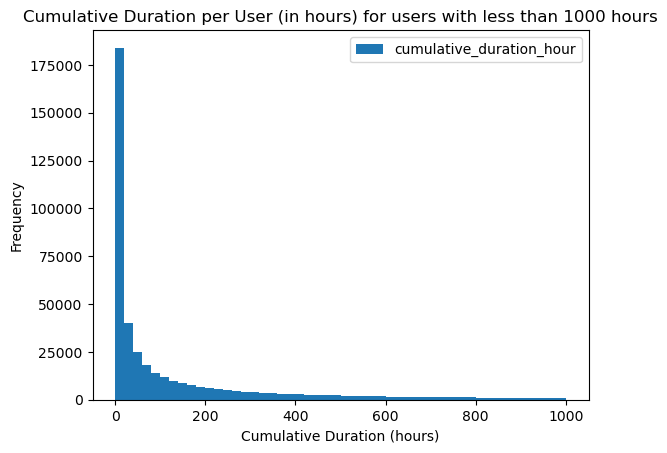

In [22]:
hours_sum_5000_less = hours_sum[hours_sum['cumulative_duration_hour'] <= 1000]
hours_sum_5000_less.plot(kind='hist', bins=50, title='Cumulative Duration per User (in hours) for users with less than 1000 hours', xlabel='Cumulative Duration (hours)', ylabel='Frequency')

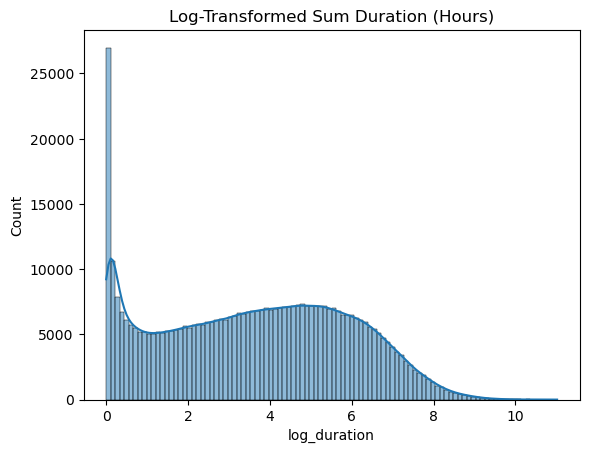

In [68]:
hours_sum['log_duration'] = np.log1p(hours_sum['cumulative_duration_hour'])
sns.histplot(hours_sum['log_duration'], bins=100, kde=True)
plt.title("Log-Transformed Sum Duration (Hours)")
plt.show()

In [23]:
# Aggregating parent category and sub-category durations
parent_subcat_00 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_01 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_01 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_02 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_02 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_03 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_03 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_04 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_04 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_05 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_05 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_06 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_06 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_07 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_07 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2 GROUP BY guid, parent_category, sub_category ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.396s              ││
│└──────────────────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     

In [24]:
# Combine all parent category and subcategory dataframes
parent_subcat_combined = pd.concat([parent_subcat_00, parent_subcat_01, parent_subcat_02, parent_subcat_03, parent_subcat_04, parent_subcat_05, parent_subcat_06, parent_subcat_07], ignore_index=True)
# Replace NaN with 0 for aggregation
parent_subcat_combined = parent_subcat_combined.replace(np.nan, 0) 
# Group by guid, parent_category, and subcategory, and sum the duration_ms
parent_subcat_aggregated = parent_subcat_combined.groupby(['guid', 'parent_category', 'sub_category']).mean().reset_index()
parent_subcat_aggregated['sum(duration_ms)'] = parent_subcat_aggregated['sum(duration_ms)'] / 3600000
parent_subcat_aggregated = parent_subcat_aggregated.rename(columns={'sum(duration_ms)': 'avg_duration_hour'})
parent_subcat_aggregated = parent_subcat_aggregated.sort_values(by='guid')

In [25]:
parent_subcat_aggregated.head()

,guid,parent_category,sub_category,avg_duration_hour
0,0000215f64624fbc99f8c23800d7e60f,entertainment,video streaming,16.977175
1,0000215f64624fbc99f8c23800d7e60f,mail,mail,2.356386
2,0000215f64624fbc99f8c23800d7e60f,other,unclassified,14.259384
3,0000215f64624fbc99f8c23800d7e60f,search,search,0.770549
20,0000840b7c804caf8e3890735a080332,social,social network,74.422898


In [26]:
# Combine all parent category and subcategory dataframes
parent_subcat_combined = pd.concat([parent_subcat_00, parent_subcat_01, parent_subcat_02, parent_subcat_03, parent_subcat_04, parent_subcat_05, parent_subcat_06, parent_subcat_07], ignore_index=True)
# Replace NaN with 0 for aggregation
parent_subcat_combined = parent_subcat_combined.replace(np.nan, 0) 
# Group by guid, parent_category, and subcategory, and sum the duration_ms
parent_subcat_sum = parent_subcat_combined.groupby(['guid', 'parent_category', 'sub_category']).sum().reset_index()
parent_subcat_sum['sum(duration_ms)'] = parent_subcat_sum['sum(duration_ms)'] / 3600000
parent_subcat_sum = parent_subcat_sum.rename(columns={'sum(duration_ms)': 'sum_duration_hour'})
parent_subcat_sum = parent_subcat_sum.sort_values(by='guid')
parent_subcat_sum.head()

,guid,parent_category,sub_category,sum_duration_hour
0,0000215f64624fbc99f8c23800d7e60f,entertainment,video streaming,16.977175
1,0000215f64624fbc99f8c23800d7e60f,mail,mail,2.356386
2,0000215f64624fbc99f8c23800d7e60f,other,unclassified,14.259384
3,0000215f64624fbc99f8c23800d7e60f,search,search,0.770549
20,0000840b7c804caf8e3890735a080332,social,social network,74.422898


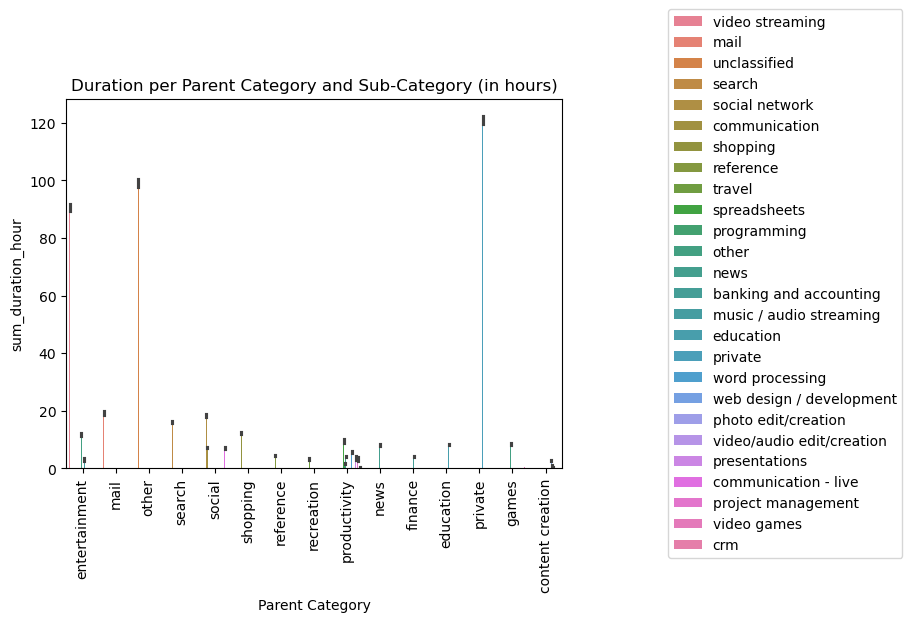

In [27]:
sns.barplot(data=parent_subcat_sum, x='parent_category', y='sum_duration_hour', hue='sub_category')
plt.xticks(rotation=90)
plt.title('Duration per Parent Category and Sub-Category (in hours)')
plt.xlabel('Parent Category')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

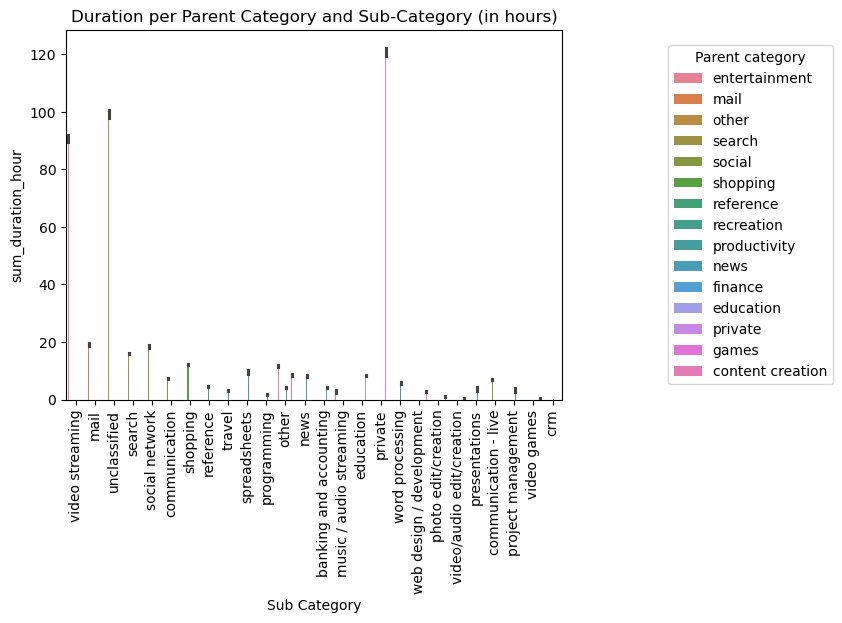

In [28]:
sns.barplot(data=parent_subcat_sum, x='sub_category', y='sum_duration_hour', hue='parent_category')
plt.xticks(rotation=90)
plt.title('Duration per Parent Category and Sub-Category (in hours)')
plt.xlabel('Sub Category')
plt.legend(title='Parent category', loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

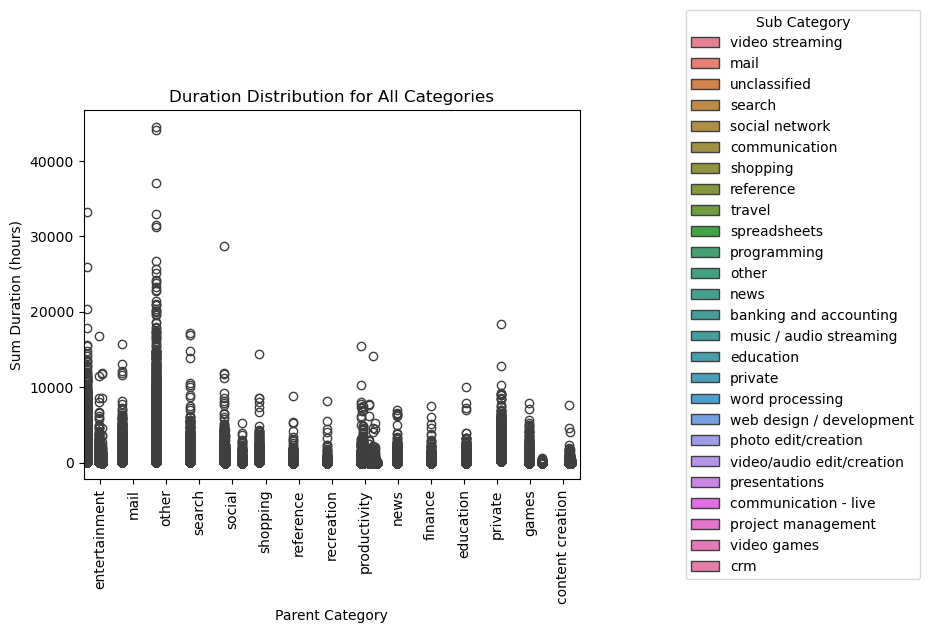

In [ ]:
# Plotting distribution for all categories
sns.boxplot(data=parent_subcat_sum, x='parent_category', y='sum_duration_hour', hue='sub_category')
plt.title('Duration Distribution for All Categories')
plt.xlabel('Parent Category')
plt.ylabel('Sum Duration (hours)')
plt.xticks(rotation=90)
plt.legend(title='Sub Category', loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

In [37]:
# Only grouping by subcategory
parent_subcat_combined = pd.concat([parent_subcat_00, parent_subcat_01, parent_subcat_02, parent_subcat_03, parent_subcat_04, parent_subcat_05, parent_subcat_06, parent_subcat_07], ignore_index=True)
# Replace NaN with 0 for aggregation
parent_subcat_combined = parent_subcat_combined.replace(np.nan, 0)
parent_subcat_combined.head()

subcat_combined = parent_subcat_combined[['guid', 'sub_category', 'sum(duration_ms)']]
subcat_combined_sum = subcat_combined.groupby(['guid', 'sub_category']).sum().reset_index()
subcat_combined_sum['sum(duration_ms)'] = subcat_combined_sum['sum(duration_ms)'] / 3600000
subcat_combined_sum = subcat_combined_sum.rename(columns={'sum(duration_ms)': 'sum_duration_hour'})
subcat_combined_sum = subcat_combined_sum.sort_values(by='guid')

In [40]:
subcat_combined_sum.describe()

,sum_duration_hour
count,4.437768e+06
mean,2.949103e+01
std,2.065347e+02
min,0.000000e+00
25%,5.480604e-02
50%,5.400908e-01
75%,5.180301e+00
max,4.455005e+04


<Axes: title={'center': 'Duration per Sub-Category (in hours)'}, xlabel='Duration (hours)', ylabel='Frequency'>

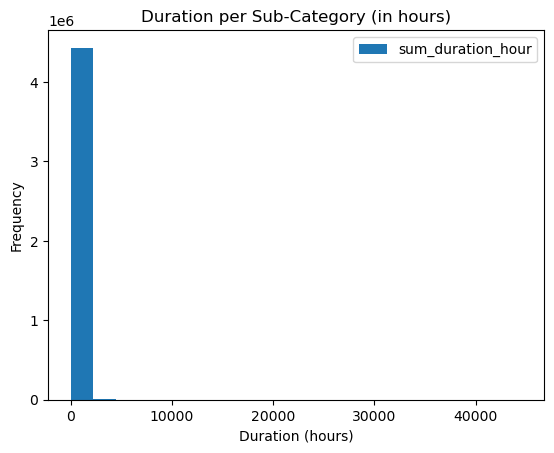

In [41]:
subcat_combined_sum.plot(kind='hist', bins=20, title='Duration per Sub-Category (in hours)', xlabel='Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Duration per Sub-Category (in hours) for users with less than 5000 hours'}, xlabel='Duration (hours)', ylabel='Frequency'>

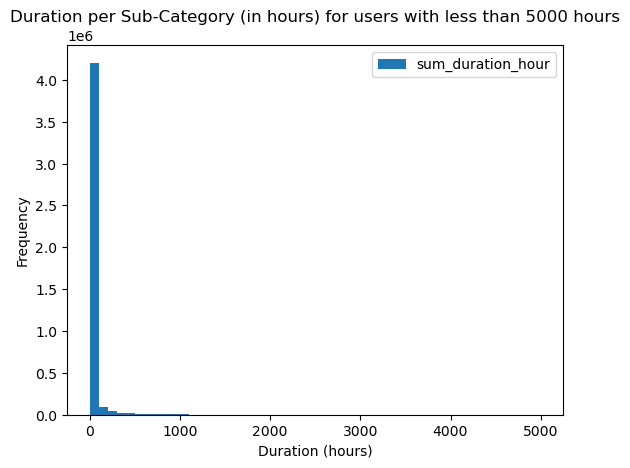

In [42]:
subcat_5000_less = subcat_combined_sum[subcat_combined_sum['sum_duration_hour'] <= 5000]
subcat_5000_less.plot(kind='hist', bins=50, title='Duration per Sub-Category (in hours) for users with less than 5000 hours', xlabel='Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Duration per Sub-Category (in hours) for users with less than 1000 hours'}, xlabel='Duration (hours)', ylabel='Frequency'>

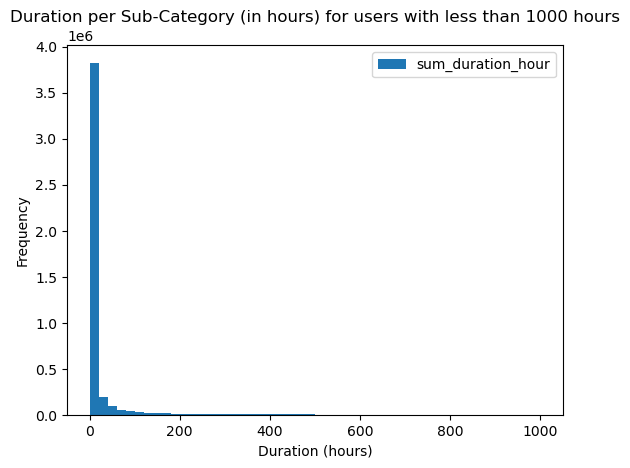

In [44]:
subcat_1000_less = subcat_combined_sum[subcat_combined_sum['sum_duration_hour'] <= 1000]
subcat_1000_less.plot(kind='hist', bins=50, title='Duration per Sub-Category (in hours) for users with less than 1000 hours', xlabel='Duration (hours)', ylabel='Frequency')

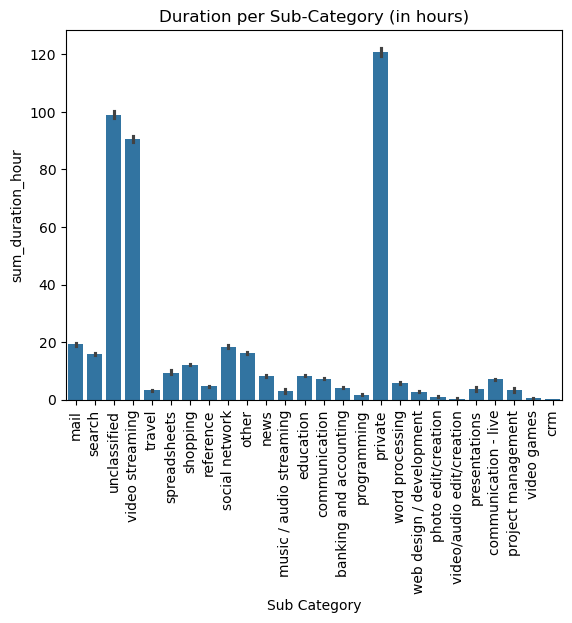

In [39]:
subcat_combined_sum_no_guid = subcat_combined_sum.drop(columns=['guid'])

sns.barplot(data=subcat_combined_sum, x='sub_category', y='sum_duration_hour')
plt.xticks(rotation=90)
plt.title('Duration per Sub-Category (in hours)')
plt.xlabel('Sub Category')
plt.show()

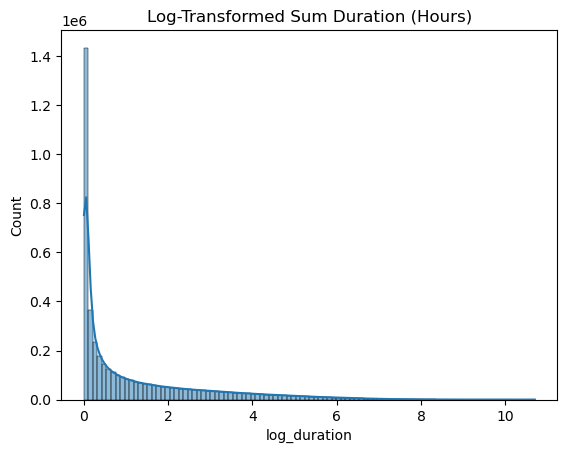

In [65]:
subcat_combined_sum['log_duration'] = np.log1p(subcat_combined_sum['sum_duration_hour'])
sns.histplot(subcat_combined_sum['log_duration'], bins=100, kde=True)
plt.title("Log-Transformed Sum Duration (Hours)")
plt.show()

In [66]:
subcat_combined_sum.describe()

,sum_duration_hour,log_duration
count,4.437768e+06,4.437768e+06
mean,2.949103e+01,1.189153e+00
std,2.065347e+02,1.573967e+00
min,0.000000e+00,0.000000e+00
25%,5.480604e-02,5.335690e-02
50%,5.400908e-01,4.318414e-01
75%,5.180301e+00,1.821367e+00
max,4.455005e+04,1.070439e+01


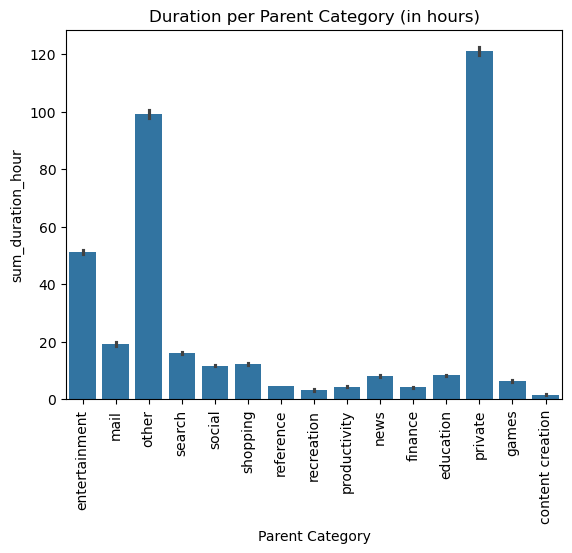

In [46]:
parent_only = parent_subcat_sum.drop(columns=['sub_category'])
parent_only_no_guid = parent_only.drop(columns=['guid'])

sns.barplot(data=parent_only, x='parent_category', y='sum_duration_hour')
plt.xticks(rotation=90)
plt.title('Duration per Parent Category (in hours)')
plt.xlabel('Parent Category')
plt.show()

In [47]:
parent_only_no_guid.describe()

,sum_duration_hour
count,4.782677e+06
mean,2.736424e+01
std,1.989551e+02
min,0.000000e+00
25%,4.971472e-02
50%,4.650589e-01
75%,4.390244e+00
max,4.455005e+04


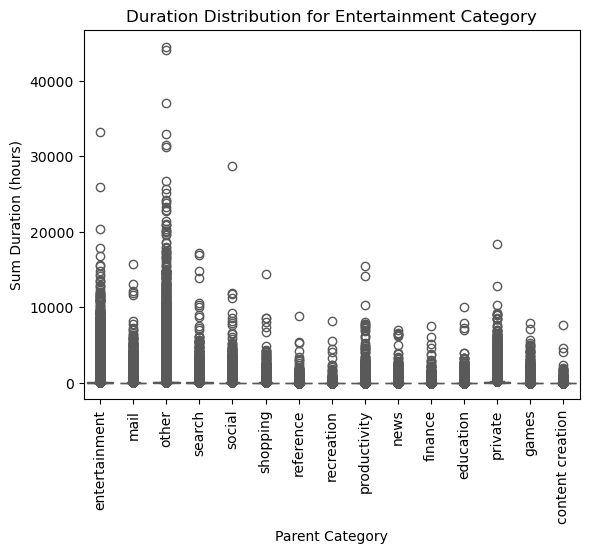

In [56]:
# Plotting distribution for entertainment
sns.boxplot(data=parent_only, x='parent_category', y='sum_duration_hour', hue='parent_category', palette='Set2')
plt.title('Duration Distribution for Entertainment Category')
plt.xlabel('Parent Category')
plt.ylabel('Sum Duration (hours)')
plt.xticks(rotation=90)
plt.show()

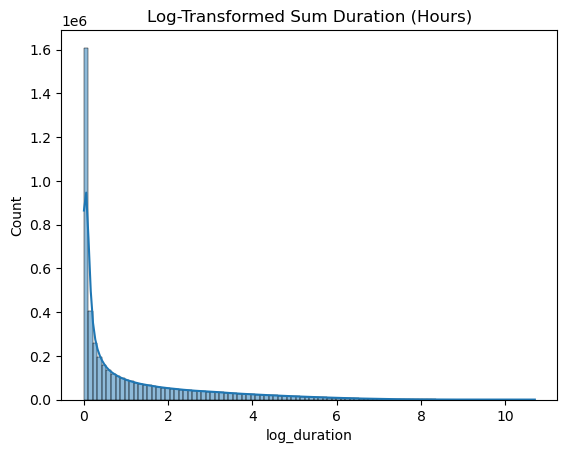

In [63]:
parent_only['log_duration'] = np.log1p(parent_only['sum_duration_hour'])
sns.histplot(parent_only['log_duration'], bins=100, kde=True)
plt.title("Log-Transformed Sum Duration (Hours)")
plt.show()

In [ ]:
# Calculating mean duration (in hours) per parent category and sub-category
mean_hours_parent_subcat = parent_subcat_aggregated.groupby(['parent_category', 'sub_category'])['avg_duration_hour'].mean().reset_index()
mean_hours_parent_subcat = mean_hours_parent_subcat.sort_values(by='avg_duration_hour', ascending=False).reset_index(drop=True)
mean_hours_parent_subcat

,parent_category,sub_category,avg_duration_hour
0,private,private,105.907788
1,other,unclassified,86.593710
2,entertainment,video streaming,79.366113
3,mail,mail,16.832689
4,social,social network,15.902253
5,search,search,13.909879
6,shopping,shopping,10.659516
7,entertainment,other,10.248016
8,productivity,spreadsheets,8.253753
9,games,other,7.380333


In [ ]:
mean_hours_parent_subcat.plot(kind='hist', bins=20, title='Average Duration per Parent Category and Sub-Category (in hours)', xlabel='Average Duration (hours)', ylabel='Frequency')

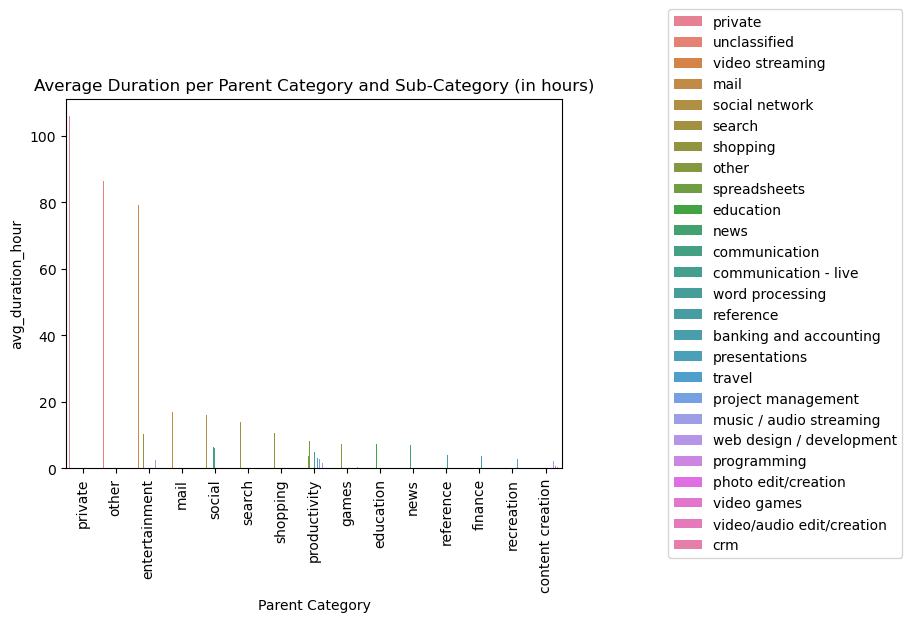

In [ ]:
sns.barplot(data=mean_hours_parent_subcat, x='parent_category', y='avg_duration_hour', hue='sub_category')
plt.xticks(rotation=90)
plt.title('Average Duration per Parent Category and Sub-Category (in hours)')
plt.xlabel('Parent Category')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

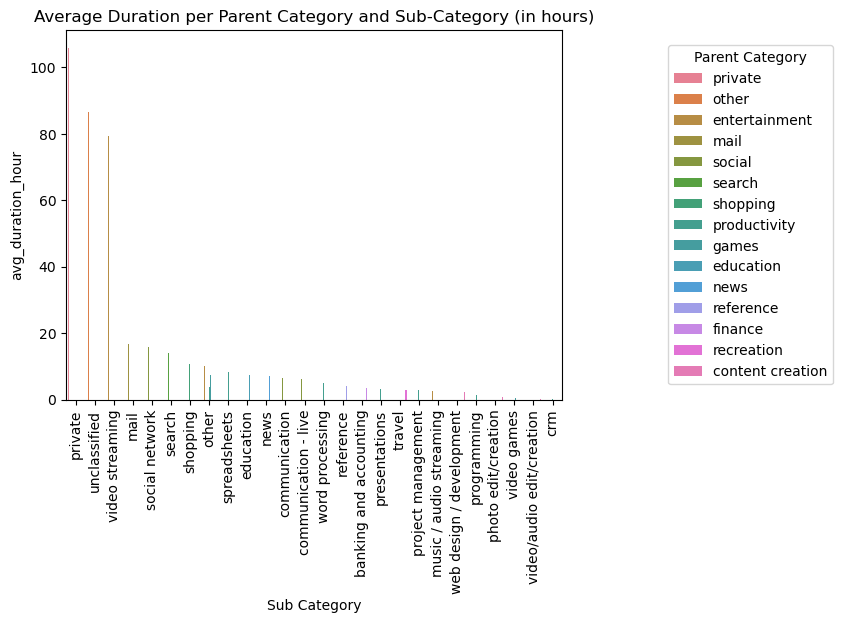

In [ ]:
sns.barplot(data=mean_hours_parent_subcat, x='sub_category', y='avg_duration_hour', hue='parent_category')
plt.xticks(rotation=90)
plt.title('Average Duration per Parent Category and Sub-Category (in hours)')
plt.xlabel('Sub Category')
plt.legend(title='Parent Category',loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

In [ ]:
# mean_hours_parent_subcat.to_csv('/Users/couch/intel_research/energy_explore/browser_eda/mean_hours_parent_subcat.csv', index=False)

In [59]:
pivot_df = parent_subcat_aggregated.pivot_table(
    index='guid',
    columns=['parent_category', 'sub_category'],
    values='avg_duration_hour',
    fill_value=0
)
pivot_df.head()

# pivot_df.to_csv('/Users/couch/intel_research/data/web_cat_usage_v2/pivoted_parent_subcat.csv')

parent_category                     content creation  \
sub_category                     photo edit/creation   
guid                                                   
0000215f64624fbc99f8c23800d7e60f                 0.0   
0000840b7c804caf8e3890735a080332                 0.0   
000091c0adc149389235ed2c5f15a59e                 0.0   
0000af8fab2d4669bad5917875158ab9                 0.0   
0000b5c7c1f54766873622d2f8786458                 0.0   

parent_category                                             \
sub_category                     video/audio edit/creation   
guid                                                         
0000215f64624fbc99f8c23800d7e60f                       0.0   
0000840b7c804caf8e3890735a080332                       0.0   
000091c0adc149389235ed2c5f15a59e                       0.0   
0000af8fab2d4669bad5917875158ab9                       0.0   
0000b5c7c1f54766873622d2f8786458                       0.0   

parent_category                                           education  \
sub_category                     web design / development education   
guid                                                                  
0000215f64624fbc99f8c23800d7e60f                 0.000000  0.000000   
0000840b7c804caf8e3890735a080332                 0.000000  0.369066   
000091c0adc149389235ed2c5f15a59e                 0.000000  0.000000   
0000af8fab2d4669bad5917875158ab9                 0.023478  3.759260   
0000b5c7c1f54766873622d2f8786458                 0.000000  0.000000   

parent_category                            entertainment             \
sub_category                     music / audio streaming      other   
guid                                                                  
0000215f64624fbc99f8c23800d7e60f                 0.00000   0.000000   
0000840b7c804caf8e3890735a080332                 1.65303  16.944852   
000091c0adc149389235ed2c5f15a59e                 0.00000   0.005916   
0000af8fab2d4669bad5917875158ab9                 0.00000   0.565321   
0000b5c7c1f54766873622d2f8786458                 0.00000   0.000000   

parent_category                                                 finance  \
sub_category                     video streaming banking and accounting   
guid                                                                      
0000215f64624fbc99f8c23800d7e60f       16.977175               0.000000   
0000840b7c804caf8e3890735a080332       59.559806               0.063566   
000091c0adc149389235ed2c5f15a59e        0.000000               0.000000   
0000af8fab2d4669bad5917875158ab9        6.273500               0.000000   
0000b5c7c1f54766873622d2f8786458        0.164809               0.000000   

parent_category                      games              ...  \
sub_category                         other video games  ...   
guid                                                    ...   
0000215f64624fbc99f8c23800d7e60f  0.000000         0.0  ...   
0000840b7c804caf8e3890735a080332  0.000000         0.0  ...   
000091c0adc149389235ed2c5f15a59e  0.000000         0.0  ...   
0000af8fab2d4669bad5917875158ab9  0.010592         0.0  ...   
0000b5c7c1f54766873622d2f8786458  0.013390         0.0  ...   

parent_category                        productivity               \
sub_category                     project management spreadsheets   
guid                                                               
0000215f64624fbc99f8c23800d7e60f                0.0     0.000000   
0000840b7c804caf8e3890735a080332                0.0     0.008011   
000091c0adc149389235ed2c5f15a59e                0.0     0.000000   
0000af8fab2d4669bad5917875158ab9                0.0     0.000000   
0000b5c7c1f54766873622d2f8786458                0.0     0.000000   

parent_category                                  recreation reference  \
sub_category                     word processing     travel reference   
guid                                                                    
0000215f64624fbc99f8c23800d7e60f        0.0000

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

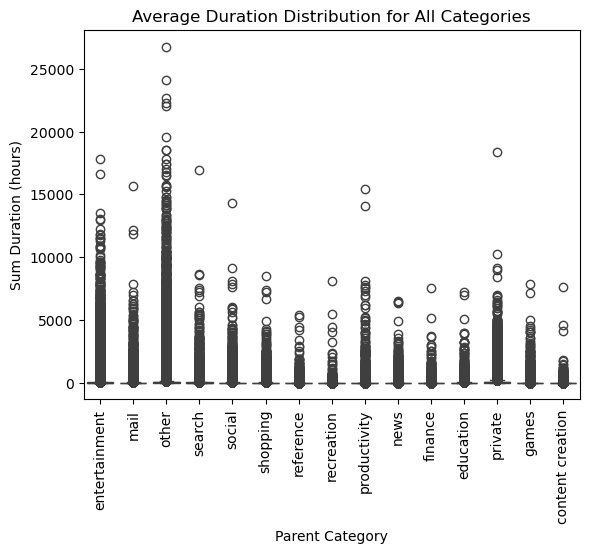

In [ ]:
# Plotting distribution for entertainment
agg_parent_only = parent_subcat_aggregated.drop(columns=['sub_category'])
sns.boxplot(data=agg_parent_only, x='parent_category', y='avg_duration_hour')
plt.title('Average Duration Distribution for All Categories')
plt.xlabel('Parent Category')
plt.ylabel('Sum Duration (hours)')
plt.xticks(rotation=90)
plt.show()